### 1.0 Importing Libraries

In [70]:
#import libries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

### 2.0 Loading datasets

In [71]:
co2emissions_bysector = pd.read_csv('../data/Climate Change - datasets/co2-emissions-by-sector.csv')
co2emissions_bysector

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,NaN,320000.0,20000.00
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,300000.0,20000.00
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,200000.0,20000.00
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,200000.0,20000.00
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,190000.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,1070000.00,470000.0,87160000.0,250000.0,2000000.0,1240000.0,NaN,5100000.0,129999.99
6556,Zimbabwe,ZWE,2018,1030000.00,560000.0,87160000.0,320000.0,2620000.0,1540000.0,NaN,5400000.0,160000.00
6557,Zimbabwe,ZWE,2019,890000.00,470000.0,87160000.0,280000.0,2240000.0,1610000.0,NaN,4990000.0,160000.00
6558,Zimbabwe,ZWE,2020,970000.00,500000.0,87160000.0,340000.0,1510000.0,1400000.0,NaN,3840000.0,60000.00


In [72]:
per_capita_co2 = pd.read_csv('../data/Climate Change - datasets/per-capita-co2-vs-average.csv')
per_capita_co2

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123
...,...,...,...,...
26177,Zimbabwe,ZWE,2019,0.672038
26178,Zimbabwe,ZWE,2020,0.547083
26179,Zimbabwe,ZWE,2021,0.645913
26180,Zimbabwe,ZWE,2022,0.648759


#### Data Understanding

In [73]:
#function to check understand the dataset:
def data_understanding(df): 
    print('Check the number of rows and columns')
    print(f'The dataset has {df.shape[0]} rows')
    print(f'The dataset has {df.shape[1]} columns\n')
    
    print('Check data info')
    print(df.info())  # Includes column types and missing values
    print('\n')

    print('Check missing values')
    print(df.isna().sum())  # Shows missing values per column
    print(df.isna().sum()/len(df)*100)
    print('\n')

    print('Check data statistics (numeric)')
    display(df.describe())  # Summary statistics for numerical data
    print('\n')

    print('Check data statistics (categorical)')
    display(df.describe(include='O'))  # Summary for categorical data
    print('\n')

    print('Check for duplicates')
    print(f'Dataset has {df.duplicated().sum()} Duplicates ')  # Number of duplicate rows



#understand co2 by sector
data_understanding(co2emissions_bysector)


Check the number of rows and columns
The dataset has 6560 rows
The dataset has 12 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        6560 non-null   object 
 1   Code                                                          6208 non-null   object 
 2   Year                                                          6560 non-null   int64  
 3   Carbon dioxide emissions from buildings                       6421 non-null   float64
 4   Carbon dioxide emissions from industry                        6305 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    6557 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion  

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
count,6560.000000,6.421000e+03,6.305000e+03,6.557000e+03,6.421000e+03,6.421000e+03,6.421000e+03,2.270000e+03,6.421000e+03,6.421000e+03
mean,2005.500000,5.509696e+07,2.142031e+07,2.577066e+07,1.246594e+07,1.164675e+08,1.013822e+08,1.588207e+07,2.516014e+08,1.931317e+07
std,9.233796,2.525762e+08,1.187214e+08,2.464913e+08,5.762671e+07,5.786553e+08,5.153394e+08,4.129882e+07,1.216841e+09,9.489783e+07
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.750000,8.000000e+04,0.000000e+00,-6.700000e+05,0.000000e+00,5.800000e+05,1.600000e+05,4.800000e+05,2.100000e+05,6.000000e+04
50%,2005.500000,6.400000e+05,4.800000e+05,3.000000e+04,2.400000e+05,3.170000e+06,1.500000e+06,2.400000e+06,3.980000e+06,5.500000e+05
75%,2013.250000,7.500000e+06,2.990000e+06,9.940000e+06,2.060000e+06,1.841000e+07,1.338000e+07,6.890000e+06,3.398000e+07,3.200000e+06
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09




Check data statistics (categorical)


,Entity,Code
count,6560,6208
unique,205,194
top,Afghanistan,AFG
freq,32,32




Check for duplicates
Dataset has 0 Duplicates 


Missing values in most columns drop column `Fugitive emissions of carbon dioxide from energy production ` since it has 65 % missing values and fill the other with median. For missing code add placeholder 'Region'

From data description electricity and heat production is the largest CO2 contributor, followed by industry and manufacturig.Transport is another major source as well. Land-use chnage can have negative emissions, indicating carbon absorption by forests in some cases.Bunker fuels contribute significantly, highlighting the impact of aviation and shipping.

on categorical columns afghanisan appears most frequently 

no duplicates in the dataset.

Afghanistan is the most common entity in the dataset

In [74]:
#Drop columns with more than 50% missing values
co2emissions_bysector.drop(columns = ['Fugitive emissions of carbon dioxide from energy production'],inplace=True)

#fill missing values with median
columns = ['Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels']

# for col in columns:
#     source_industry[col].fillna(source_industry[col].median(),inplace=True)
co2emissions_bysector[columns] = co2emissions_bysector[columns].apply(lambda x: x.fillna(x.median()))

In [75]:
#confirm missing values
print(co2emissions_bysector.isna().sum())
co2emissions_bysector.query('Code.isna()')['Entity'].unique()

Entity                                                            0
Code                                                            352
Year                                                              0
Carbon dioxide emissions from buildings                           0
Carbon dioxide emissions from industry                            0
Carbon dioxide emissions from land use change and forestry        0
Carbon dioxide emissions from other fuel combustion               0
Carbon dioxide emissions from transport                           0
Carbon dioxide emissions from manufacturing and construction      0
Carbon dioxide emissions from electricity and heat                0
Carbon dioxide emissions from bunker fuels                        0
dtype: int64


array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries'], dtype=object)

In [76]:
#fill code NAN
co2emissions_bysector['Code'].fillna('Region',inplace=True)
#confirm fill
print(co2emissions_bysector.isna().sum())

Entity                                                          0
Code                                                            0
Year                                                            0
Carbon dioxide emissions from buildings                         0
Carbon dioxide emissions from industry                          0
Carbon dioxide emissions from land use change and forestry      0
Carbon dioxide emissions from other fuel combustion             0
Carbon dioxide emissions from transport                         0
Carbon dioxide emissions from manufacturing and construction    0
Carbon dioxide emissions from electricity and heat              0
Carbon dioxide emissions from bunker fuels                      0
dtype: int64


### EDA
#### 1. Total Emissions by sector

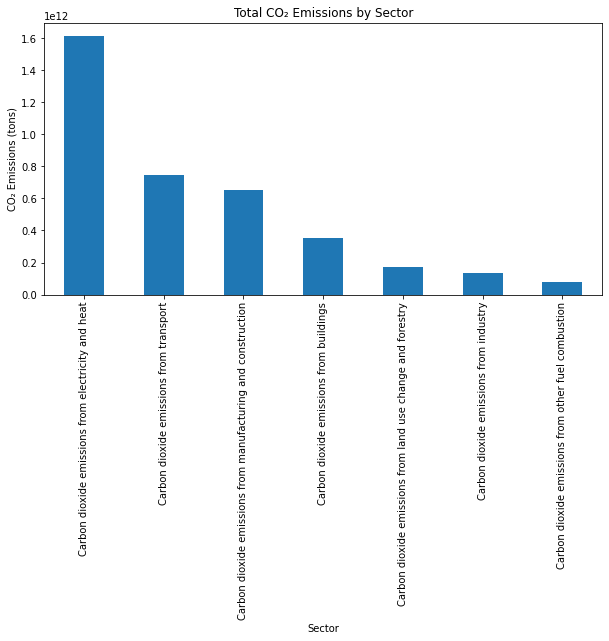

In [77]:
emission_columns = [
    "Carbon dioxide emissions from buildings",
    "Carbon dioxide emissions from industry",
    "Carbon dioxide emissions from land use change and forestry",
    "Carbon dioxide emissions from other fuel combustion",
    "Carbon dioxide emissions from transport",
    "Carbon dioxide emissions from manufacturing and construction",
    "Carbon dioxide emissions from electricity and heat",
]

# Grouping emissions by sector (Summing over all years)
sector_emissions = co2emissions_bysector[emission_columns].sum()

# Convert to DataFrame for better visualization
sector_emissions_df = pd.DataFrame(sector_emissions, columns=["Total Emissions"])
sector_emissions_df = sector_emissions_df.sort_values(by="Total Emissions", ascending=False)

sector_emissions_df.plot(kind="bar", figsize=(10,5), legend=False)
plt.title("Total CO₂ Emissions by Sector")
plt.ylabel("CO₂ Emissions (tons)")
plt.xlabel("Sector")
plt.show()

Carbon dioxide emissions from electricity and heat has most emissions

#### 2. Emissions by year

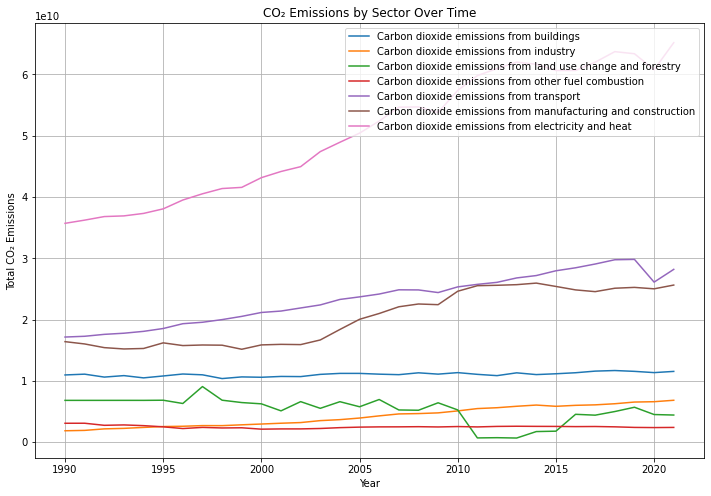

In [78]:
sector_yearly = co2emissions_bysector.groupby('Year')[emission_columns].sum()

plt.figure(figsize=(12,8))
for sector in emission_columns:
    plt.plot(sector_yearly.index, sector_yearly[sector], label=sector)
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions")
plt.title("CO₂ Emissions by Sector Over Time")
plt.grid()
plt.legend(loc='upper right');

Electricity & heat production is the largest source of emissions
Transport and industry are growing steadily
land-use change has irregular trends, likely due to deforestation and conversation efforts
A drop in emissions aorund 2020 could be linked to COVID-19 economic slowdows

#### 3. Emissions by Sector and country

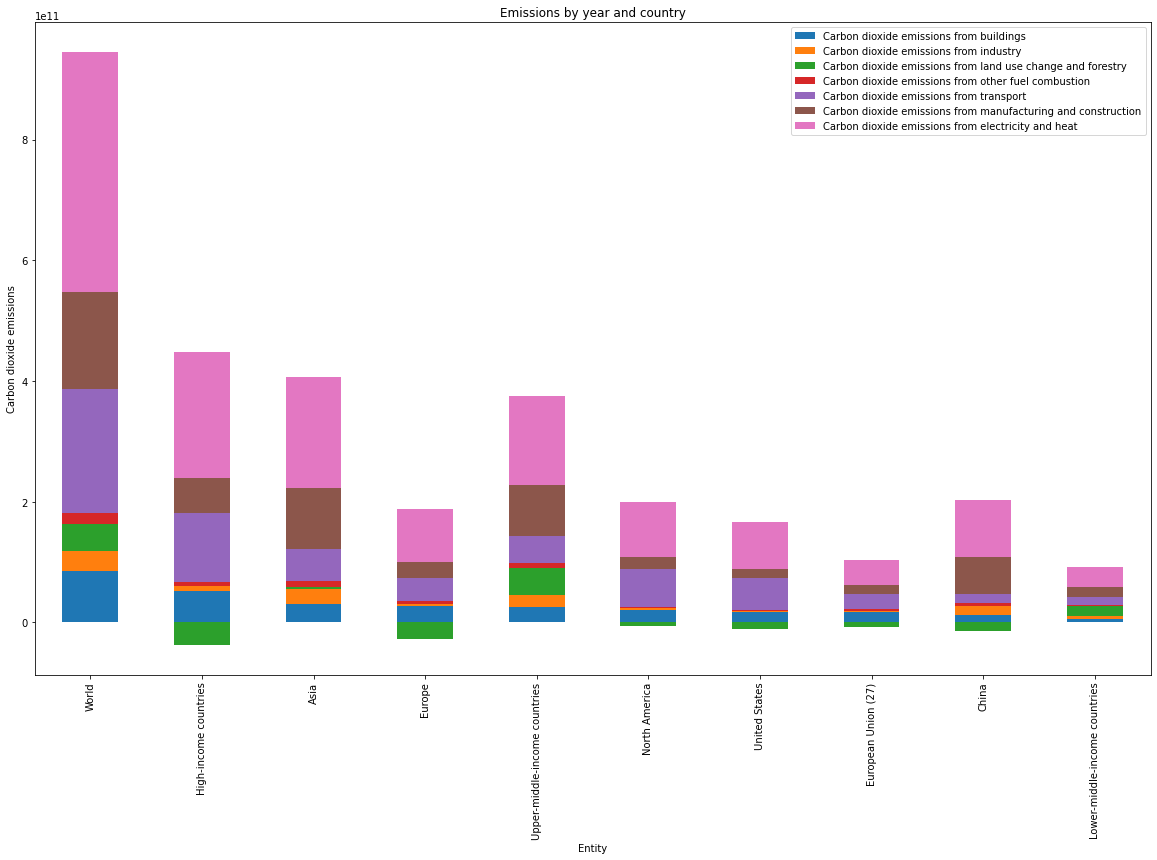

In [79]:
co2emissions = co2emissions_bysector.groupby('Entity')[emission_columns].sum().sort_values(by=emission_columns,ascending=False).head(10)
co2emissions.plot(kind='bar',stacked=True,figsize=(20,12))
plt.ylabel('Carbon dioxide emissions')
plt.title('Emissions by year and country');

Global CO₂ emissions are the highest, significantly surpassing individual regions.
Electricity and heat generation (light pink) appears to be the largest contributor across most regions.
High-income countries have lower emissions compared to Asia and upper-middle-income countries.
China has a significant share of emissions, comparable to the United States and European Union combined.
Lower-middle-income countries contribute relatively less to total emissions.

### Data understanding of per capita average

In [80]:
data_understanding(per_capita_co2)

Check the number of rows and columns
The dataset has 26182 rows
The dataset has 4 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26182 non-null  object 
 1   Code                               22895 non-null  object 
 2   Year                               26182 non-null  int64  
 3   Annual CO₂ emissions (per capita)  26182 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 818.3+ KB
None


Check missing values
Entity                                  0
Code                                 3287
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64
Entity                                0.000000
Code                                 12.554427
Year                              

,Year,Annual CO₂ emissions (per capita)
count,26182.000000,26182.000000
mean,1952.841074,3.815395
std,53.168164,14.383452
min,1750.000000,0.000000
25%,1919.000000,0.169388
50%,1965.000000,1.013228
75%,1995.000000,4.296536
max,2023.000000,782.682070




Check data statistics (categorical)


,Entity,Code
count,26182,22895
unique,231,215
top,United Kingdom,NOR
freq,229,229




Check for duplicates
Dataset has 0 Duplicates 


Code column has missing values for regions.lets relace with region

Highly skewed distribution: A few entities have extremely high emissions, raising the mean significantly above the median.
Most entities emit little CO₂ per capita, as shown by the 25th percentile at 0.17 tons.
A long history of recorded emissions, spanning from 1750 to 2023.

United Kingdom appears most often, suggesting frequent records for this entity.

no duplicates

In [81]:
print(f"Entities with missing codes:\n{per_capita_co2.query('Code.isna()')['Entity'].unique()}")
#fill code NAN
per_capita_co2['Code'].fillna('Region',inplace=True)
#confirm fill
print(per_capita_co2.isna().sum())

Entities with missing codes:
['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'North America'
 'North America (excl. USA)' 'Oceania' 'South America'
 'Upper-middle-income countries']
Entity                               0
Code                                 0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64


### EDA
#### 1.Per capita emissions per year

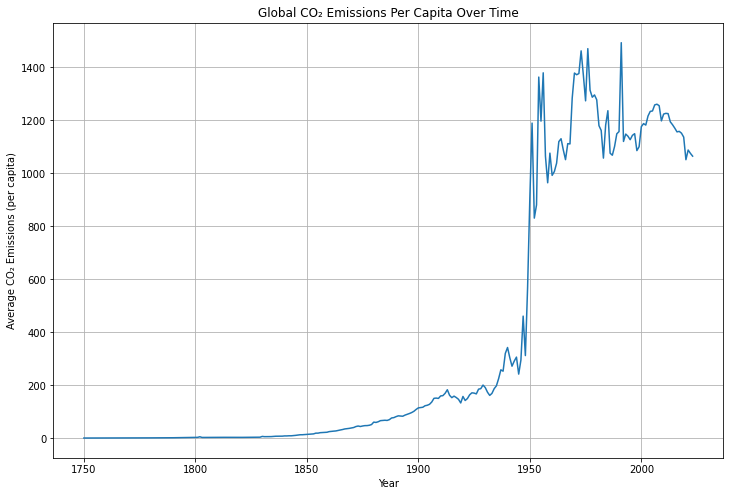

In [82]:
per_capita_co2.groupby('Year')['Annual CO₂ emissions (per capita)'].sum().plot(figsize=(12,8))
# Labels and title
plt.xlabel("Year")
plt.ylabel("Average CO₂ Emissions (per capita)")
plt.title("Global CO₂ Emissions Per Capita Over Time")
plt.grid(True);

Pre-Industrial Era (Before 1850):

Emissions were nearly flat and minimal.
This suggests very low fossil fuel use before industrialization.
Industrial Revolution (1850–1950):

A gradual increase is observed.
This aligns with the rise of coal and early industrial activities.
Post-WWII Boom (1950s–1980s):

Sharp spike in emissions, likely due to industrial expansion and energy consumption.
The development of cars, factories, and power plants significantly increased emissions.
Fluctuations in Recent Decades (1980s–2020s):

There are peaks and drops, possibly due to economic crises, energy transitions, or climate policies.
A declining trend after the 2000s may indicate shifts towards renewable energy.

### 2. EMissions for the latest year

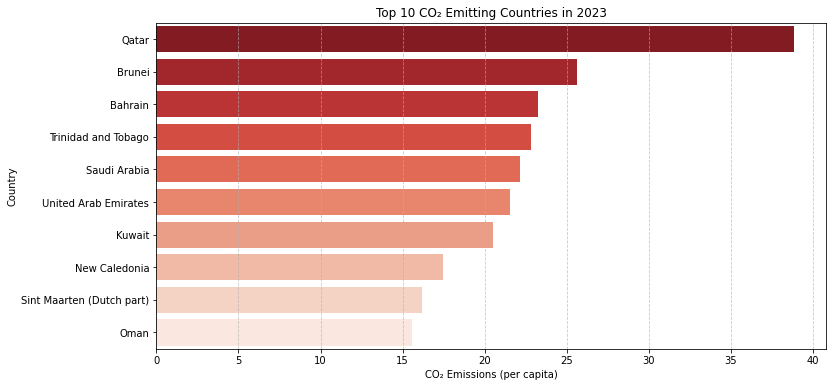

In [83]:
# Get the most recent year
latest_year = per_capita_co2["Year"].max()

# Filter for the latest year and get top 10 emitters
top_emitters = per_capita_co2[per_capita_co2["Year"] == latest_year].nlargest(10, "Annual CO₂ emissions (per capita)")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters, x="Annual CO₂ emissions (per capita)", y="Entity", palette="Reds_r")

plt.xlabel("CO₂ Emissions (per capita)")
plt.ylabel("Country")
plt.title(f"Top 10 CO₂ Emitting Countries in {latest_year}")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

### 3.0  Merge Datasets

In [84]:
co2_emissions = pd.merge(co2emissions_bysector,per_capita_co2,on= ['Entity','Year'],how='inner')
co2_emissions

,Entity,Code_x,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Code_y,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,320000.0,20000.00,AFG,0.168054
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,300000.0,20000.00,AFG,0.156411
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,20000.00,AFG,0.111609
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,200000.0,20000.00,AFG,0.099507
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,190000.0,20000.00,AFG,0.089462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6542,Zimbabwe,ZWE,2017,1070000.00,470000.0,87160000.0,250000.0,2000000.0,1240000.0,5100000.0,129999.99,ZWE,0.663408
6543,Zimbabwe,ZWE,2018,1030000.00,560000.0,87160000.0,320000.0,2620000.0,1540000.0,5400000.0,160000.00,ZWE,0.745314
6544,Zimbabwe,ZWE,2019,890000.00,470000.0,87160000.0,280000.0,2240000.0,1610000.0,4990000.0,160000.00,ZWE,0.672038
6545,Zimbabwe,ZWE,2020,970000.00,500000.0,87160000.0,340000.0,1510000.0,1400000.0,3840000.0,60000.00,ZWE,0.547083


In [85]:
data_understanding(co2_emissions)

Check the number of rows and columns
The dataset has 6547 rows
The dataset has 13 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6547 entries, 0 to 6546
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        6547 non-null   object 
 1   Code_x                                                        6547 non-null   object 
 2   Year                                                          6547 non-null   int64  
 3   Carbon dioxide emissions from buildings                       6547 non-null   float64
 4   Carbon dioxide emissions from industry                        6547 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    6547 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion  

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Annual CO₂ emissions (per capita)
count,6547.000000,6.547000e+03,6.547000e+03,6.547000e+03,6.547000e+03,6.547000e+03,6.547000e+03,6.547000e+03,6.547000e+03,6547.000000
mean,2005.528639,5.404987e+07,2.064650e+07,2.580787e+07,1.223101e+07,1.142919e+08,9.946219e+07,2.468418e+08,1.895272e+07,4.736469
std,9.220417,2.502452e+08,1.165731e+08,2.466776e+08,5.709405e+07,5.732696e+08,5.105396e+08,1.205552e+09,9.401530e+07,7.768662
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1998.000000,8.000000e+04,1.000000e+04,-6.800000e+05,0.000000e+00,6.150000e+05,1.800000e+05,2.200000e+05,7.000000e+04,0.646837
50%,2006.000000,6.400000e+05,4.800000e+05,3.000000e+04,2.400000e+05,3.170000e+06,1.500000e+06,3.980000e+06,5.500000e+05,2.440182
75%,2014.000000,6.845000e+06,2.750000e+06,9.950000e+06,1.990000e+06,1.762000e+07,1.276000e+07,3.277500e+07,3.020000e+06,6.566366
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,1.622524e+10,1.325790e+09,364.688320




Check data statistics (categorical)


,Entity,Code_x,Code_y
count,6547,6547,6547
unique,205,195,195
top,Afghanistan,Region,Region
freq,32,352,352




Check for duplicates
Dataset has 0 Duplicates 


In [86]:
#copy the merged dataframe
df_merged = co2_emissions.copy(deep=True)
df_merged.head()

,Entity,Code_x,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Code_y,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,320000.0,20000.0,AFG,0.168054
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,300000.0,20000.0,AFG,0.156411
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,20000.0,AFG,0.111609
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,200000.0,20000.0,AFG,0.099507
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,190000.0,20000.0,AFG,0.089462


In [87]:
df_merged['Year'] = pd.to_datetime(df_merged['Year'], format='%Y')

# Select a country for prediction (e.g., United States)
country = "United States"
df_country = df_merged.query('Entity==@country')

# Aggregate total CO₂ emissions (sum across sectors)
df_country["Total_CO2_Emissions"] = df_country.iloc[:, 2:].sum(axis=1)

# Prepare data for Prophet
df_prophet = df_country[['Year', 'Total_CO2_Emissions']].rename(columns={'Year': 'ds', 'Total_CO2_Emissions': 'y'})

# Display cleaned dataset for Prophet
df_prophet.head()

<ipython-input-87-2c452db14198>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_country["Total_CO2_Emissions"] = df_country.iloc[:, 2:].sum(axis=1)
<ipython-input-87-2c452db14198>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country["Total_CO2_Emissions"] = df_country.iloc[:, 2:].sum(axis=1)


,ds,y
6195,1990-01-01,4.558520e+09
6196,1991-01-01,4.526740e+09
6197,1992-01-01,4.605890e+09
6198,1993-01-01,4.711080e+09
6199,1994-01-01,4.781470e+09


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

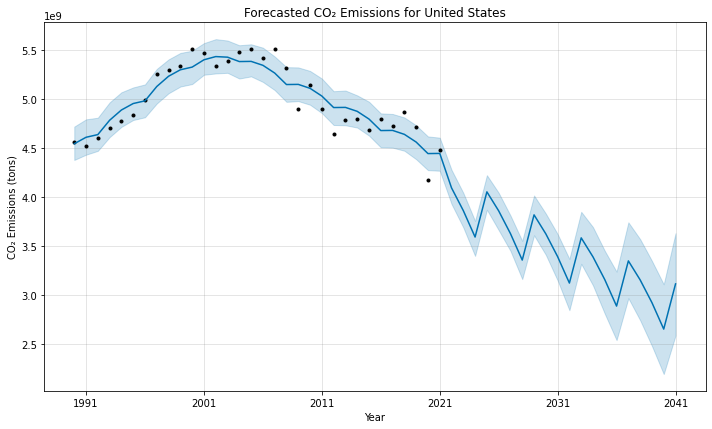

In [88]:
np.float = np.float64
np.int = np.int64

# Initialize Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe (next 20 years)
future = model.make_future_dataframe(periods=20, freq='Y')

# Generate forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title(f'Forecasted CO₂ Emissions for {country}')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (tons)')
plt.show()


### Risk Classification

In [89]:
# Compute percentiles for classification
high_threshold = df_merged["Annual CO₂ emissions (per capita)"].quantile(0.8)
low_threshold = df_merged["Annual CO₂ emissions (per capita)"].quantile(0.4)

# Function to classify risk level
def classify_risk(value):
    if value >= high_threshold:
        return "High Risk"
    elif value >= low_threshold:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Apply classification
df_merged["Risk_Category"] = df_merged["Annual CO₂ emissions (per capita)"].apply(classify_risk)

# Display sample data with risk category
df_merged[['Entity', 'Year', 'Annual CO₂ emissions (per capita)', 'Risk_Category']].head()

,Entity,Year,Annual CO₂ emissions (per capita),Risk_Category
0,Afghanistan,1990-01-01,0.168054,Low Risk
1,Afghanistan,1991-01-01,0.156411,Low Risk
2,Afghanistan,1992-01-01,0.111609,Low Risk
3,Afghanistan,1993-01-01,0.099507,Low Risk
4,Afghanistan,1994-01-01,0.089462,Low Risk


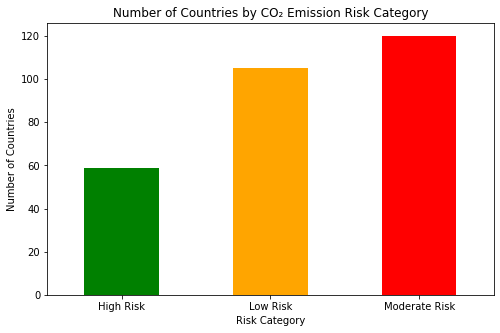

In [90]:


# Count the number of countries in each risk category
risk_counts = df_merged.groupby("Risk_Category")["Entity"].nunique()

# Plot the distribution of risk categories
plt.figure(figsize=(8, 5))
risk_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Number of Countries by CO₂ Emission Risk Category")
plt.xlabel("Risk Category")
plt.ylabel("Number of Countries")
plt.xticks(rotation=0)
plt.show()


In [91]:
### country wise visualization

In [92]:
# Group data by Risk Category and list countries
risk_country_counts = df_merged.groupby("Risk_Category")["Entity"].unique()

# Convert to a readable format
risk_country_summary = {category: list(countries) for category, countries in risk_country_counts.items()}

# Display sample of country-wise breakdown
risk_country_summary


{'High Risk': ['Andorra',
  'Australia',
  'Austria',
  'Bahrain',
  'Belarus',
  'Belgium',
  'Brunei',
  'Bulgaria',
  'Canada',
  'China',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Estonia',
  'Europe',
  'European Union (27)',
  'Finland',
  'Germany',
  'Greece',
  'High-income countries',
  'Iceland',
  'Iran',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Kazakhstan',
  'Kuwait',
  'Libya',
  'Lithuania',
  'Luxembourg',
  'Malaysia',
  'Moldova',
  'Mongolia',
  'Nauru',
  'Netherlands',
  'New Zealand',
  'North America',
  'Norway',
  'Oceania',
  'Oman',
  'Palau',
  'Poland',
  'Qatar',
  'Russia',
  'Saudi Arabia',
  'Serbia',
  'Singapore',
  'Slovakia',
  'Slovenia',
  'South Africa',
  'South Korea',
  'Spain',
  'Trinidad and Tobago',
  'Turkmenistan',
  'Ukraine',
  'United Arab Emirates',
  'United Kingdom',
  'United States'],
 'Low Risk': ['Afghanistan',
  'Africa',
  'Albania',
  'Angola',
  'Armenia',
  'Bangladesh',
  'Belize',
  'Benin',
  'Bhutan',
  'Boliv

### Emissions by sector

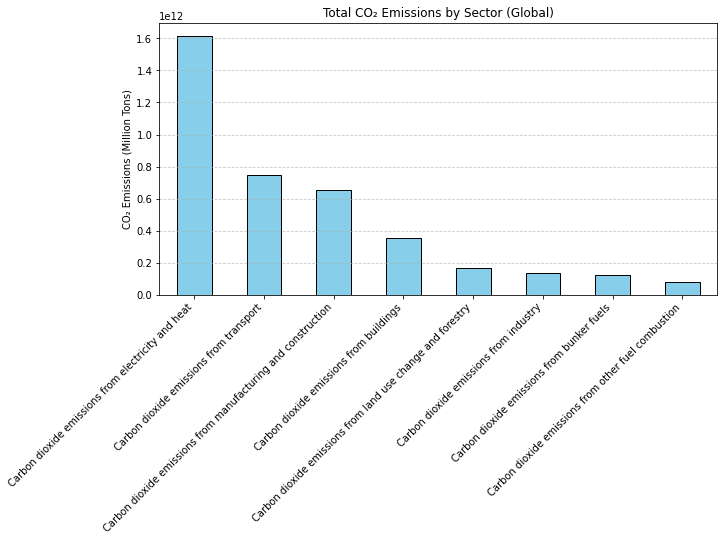

In [93]:
# Select sector-related columns
sector_columns = [
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels'
]

# Aggregate total emissions by sector
sector_totals = df_merged[sector_columns].sum().sort_values(ascending=False)

# Plot sector-wise CO₂ emissions
plt.figure(figsize=(10, 5))
sector_totals.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total CO₂ Emissions by Sector (Global)")
plt.ylabel("CO₂ Emissions (Million Tons)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()







- Electricity & Heat Production  is the largest CO₂ emitter.
- Industry & Manufacturing  also contribute significantly.
- Transport  is another major source of emissions.

In [ ]:
# df_merged.query('Code_x=="Region"')['Entity'].value_counts().index

Index(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries'],
      dtype='object')